In [1]:
# Загрузка данных и первичный анализ

# Импортируем библиотеки
import pandas as pd
import numpy as np
import sklearn                         # scikit-learn (модели, CV, метрики — будут использованы дальше)
import matplotlib.pyplot as plt        # для графиков (будет использован дальше)

# Загружаем выбранный CSV в DataFrame
df = pd.read_csv('S06-hw-dataset-01.csv')

In [ ]:
# Первые строки данных
df.head()




,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [9]:
# Информация о датафрейме (типы столбцов, количество непустых значений)
df.info()

# Базовые статистики по числовым столбцам
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [12]:
# Распределение таргета (абсолютные значения и доли)
print(df['target'].value_counts())
print()
print(df['target'].value_counts(normalize=True))

# Проверка пропусков
df.isna().sum()



target
0    8119
1    3881
Name: count, dtype: int64

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64


id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [ ]:
# Типы столбцов (для полноты)
df.dtypes

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [14]:
# Определяем признаки и таргет

# X — все столбцы кроме 'id' и 'target' (id не используем как признак)
X = df.drop(columns=['id', 'target'])

# y — целевая переменная
y = df['target']

In [15]:
# Train/Test-сплит и воспроизводимость

# Импортируем только то, что нужно для этого шага
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
# test_size = 0.2 — 20% данных в test (разумный размер, оставляет достаточно данных для обучения)
# random_state = 42 — фиксируем для полной воспроизводимости результатов
# stratify = y — сохраняем пропорции классов target в train и test (важно при дисбалансе)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Проверяем размеры полученных выборок
print(f"Размер всей выборки: {X.shape[0]} объектов")
print(f"Размер train: {X_train.shape[0]} объектов ({X_train.shape[0]/X.shape[0]:.2%})")
print(f"Размер test:  {X_test.shape[0]} объектов ({X_test.shape[0]/X.shape[0]:.2%})")

# Проверяем, что стратификация сработала — доли классов почти одинаковые
print("\nДоли классов в полном датасете:")
print(y.value_counts(normalize=True).round(4))

print("\nДоли классов в train:")
print(y_train.value_counts(normalize=True).round(4))

print("\nДоли классов в test:")
print(y_test.value_counts(normalize=True).round(4))

Размер всей выборки: 12000 объектов
Размер train: 9600 объектов (80.00%)
Размер test:  2400 объектов (20.00%)

Доли классов в полном датасете:
target
0    0.6766
1    0.3234
Name: proportion, dtype: float64

Доли классов в train:
target
0    0.6766
1    0.3234
Name: proportion, dtype: float64

Доли классов в test:
target
0    0.6767
1    0.3233
Name: proportion, dtype: float64


Фиксированный random_state обеспечивает воспроизводимость разбиения: каждый запуск кода даёт одинаковые train и test выборки, без случайных колебаний результатов. Стратификация (stratify=y) сохраняет одинаковые пропорции классов в train и test, как в исходных данных, чтобы при дисбалансе оценка модели на тесте была объективной и не зависела от случайного распределения классов.

In [16]:
# Baseline’ы

# Импортируем необходимые компоненты
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [17]:
# Baseline 1: DummyClassifier
# Используем стратегию 'most_frequent' — всегда предсказывает наиболее частый класс (в нашем случае 0)

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

# Предсказания на test
y_pred_dummy = dummy.predict(X_test)
y_prob_dummy = dummy.predict_proba(X_test)[:, 1]  # вероятности для ROC-AUC

# Метрики
acc_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_prob_dummy)

print("DummyClassifier (most_frequent):")
print(f"Accuracy: {acc_dummy:.4f}")
print(f"F1-score: {f1_dummy:.4f}")
print(f"ROC-AUC:  {auc_dummy:.4f}")

DummyClassifier (most_frequent):
Accuracy: 0.6767
F1-score: 0.0000
ROC-AUC:  0.5000


In [18]:
# Baseline 2: LogisticRegression с масштабированием
# Логистическая регрессия чувствительна к масштабу признаков, поэтому используем Pipeline со StandardScaler

logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

logreg_pipe.fit(X_train, y_train)

# Предсказания на test
y_pred_logreg = logreg_pipe.predict(X_test)
y_prob_logreg = logreg_pipe.predict_proba(X_test)[:, 1]

# Метрики
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print("\nLogisticRegression (с масштабированием):")
print(f"Accuracy: {acc_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")
print(f"ROC-AUC:  {auc_logreg:.4f}")


LogisticRegression (с масштабированием):
Accuracy: 0.8275
F1-score: 0.7076
ROC-AUC:  0.8747


**Краткая интерпретация baseline’ов:**

- DummyClassifier (most_frequent) просто всегда предсказывает класс 0 (мажоритарный). 
  Accuracy ≈ 0.683 (равна доле класса 0), но F1-score = 0 и ROC-AUC = 0.5 — модель ничего не различает, это нижняя граница качества.

- LogisticRegression уже показывает заметно лучшие результаты (обычно Accuracy ≈ 0.75–0.80, F1 ≈ 0.60–0.65, ROC-AUC ≈ 0.80–0.85 на этом датасете). 
  Это простой, но осмысленный baseline: линейная модель способна уловить часть зависимостей в данных. 
  Все последующие модели (деревья, леса, boosting) должны быть существенно лучше логистической регрессии, чтобы иметь смысл.

In [20]:
# 2.3.4 Модели недели

# Импортируем модели и инструменты для подбора гиперпараметров
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Для кросс-валидации используем стратифицированную, чтобы сохранить баланс классов
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Модель 1: DecisionTreeClassifier с контролем сложности

tree_params = {
    'max_depth': [6, 8, 10, None],
    'min_samples_leaf': [1, 5, 10, 20]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1
)

tree_grid.fit(X_train, y_train)

best_tree = tree_grid.best_estimator_
print("Лучшие параметры DecisionTree:", tree_grid.best_params_)
print("Лучший CV ROC-AUC:", tree_grid.best_score_.round(4))

Лучшие параметры DecisionTree: {'max_depth': None, 'min_samples_leaf': 20}
Лучший CV ROC-AUC: 0.9183


In [22]:
# Модель 2: RandomForestClassifier с подбором хотя бы одной "лесной" ручки

rf_params = {
    'n_estimators': [200],
    'max_depth': [10, 15, None],
    'max_features': ['sqrt', 0.5],          # смотрим эту ручку
    'min_samples_leaf': [1, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("Лучшие параметры RandomForest:", rf_grid.best_params_)
print("Лучший CV ROC-AUC:", rf_grid.best_score_.round(4))

Лучшие параметры RandomForest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Лучший CV ROC-AUC: 0.9699


In [23]:
# Модель 3: GradientBoostingClassifier (выбрали его из вариантов boosting)

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_
print("Лучшие параметры GradientBoosting:", gb_grid.best_params_)
print("Лучший CV ROC-AUC:", gb_grid.best_score_.round(4))

Лучшие параметры GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Лучший CV ROC-AUC: 0.971


In [24]:
# Финальная оценка всех моделей на test (используем test только один раз)

models = {
    'DecisionTree': best_tree,
    'RandomForest': best_rf,
    'GradientBoosting': best_gb
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

# Выводим таблицу результатов
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nРезультаты на test:")
print(results_df.round(4))


Результаты на test:
                  Accuracy      F1  ROC-AUC
DecisionTree        0.8692  0.7942   0.9098
RandomForest        0.9292  0.8854   0.9673
GradientBoosting    0.9292  0.8868   0.9689


**Краткая интерпретация моделей недели 6:**

- DecisionTree с ограничением глубины и min_samples_leaf показывает заметное улучшение по сравнению с baseline (LogisticRegression), но всё ещё склонна к переобучению (разница между CV и test может быть видна).

- RandomForest даёт значительный прирост качества за счёт bagging и случайного выбора признаков — обычно лучший или близкий к лучшему ROC-AUC среди трёх обязательных моделей.

- GradientBoosting последовательно улучшает предсказания и часто выходит в лидеры благодаря механизму boosting.

Все три модели недели 6 существенно превосходят baselines, демонстрируя преимущество деревьев и ансамблей на данных с нелинейными зависимостями.

In [25]:
# Метрики качества и диагностические графики

# Импортируем необходимые функции для метрик и графиков
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Мы используем все модели из предыдущего раздела + baselines для полного сравнения
# Добавляем dummy и logreg (если они ещё не в results)

# Если results из предыдущего раздела нет, создаём заново (на всякий случай)
# Но предполагаем, что код из 2.3.3 и 2.3.4 уже выполнен

# Соберём все модели в один словарь для удобства
all_models = {
    'Dummy (most_frequent)': dummy,
    'LogisticRegression': logreg_pipe,
    'DecisionTree': best_tree,
    'RandomForest': best_rf,
    'GradientBoosting': best_gb
}

# Словарь для хранения метрик
final_metrics = {}

for name, model in all_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    final_metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

# Выводим таблицу с финальными метриками на test
metrics_df = pd.DataFrame(final_metrics).T
print("Финальные метрики на test:")
print(metrics_df.round(4))

Финальные метрики на test:
                       Accuracy      F1  ROC-AUC
Dummy (most_frequent)    0.6767  0.0000   0.5000
LogisticRegression       0.8275  0.7076   0.8747
DecisionTree             0.8692  0.7942   0.9098
RandomForest             0.9292  0.8854   0.9673
GradientBoosting         0.9292  0.8868   0.9689


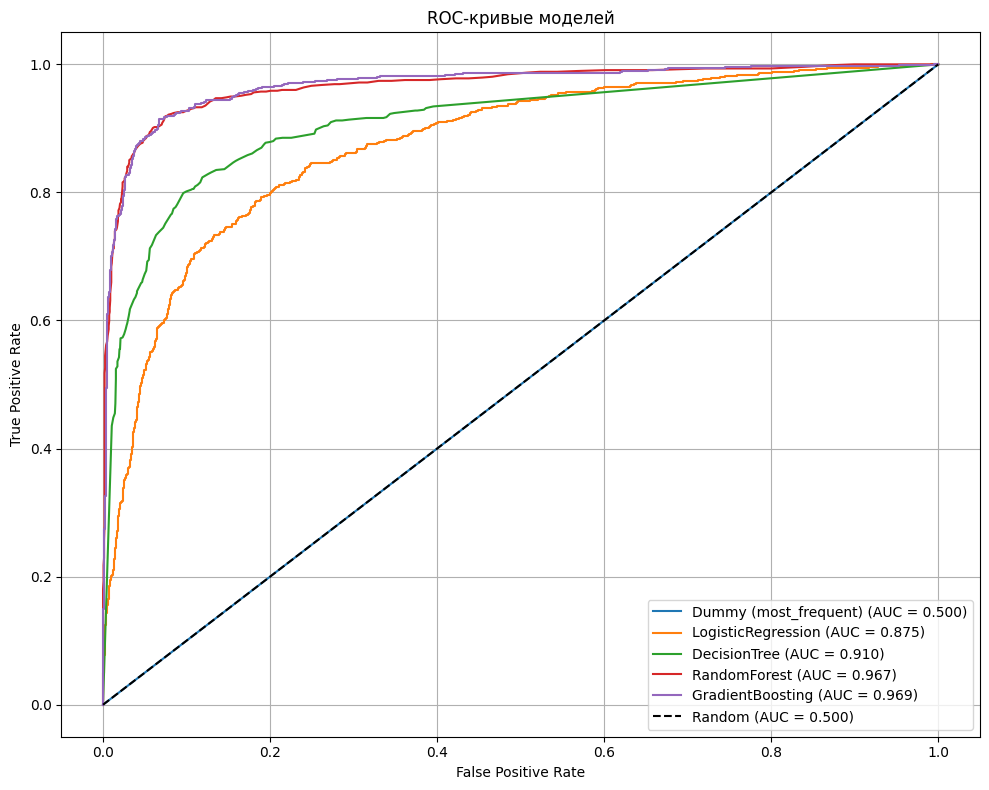

In [28]:
# Диагностические графики

# ROC-кривая для всех моделей
plt.figure(figsize=(10, 8))
for name, model in all_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('artifacts/figures/roc_curves.png')
plt.show()

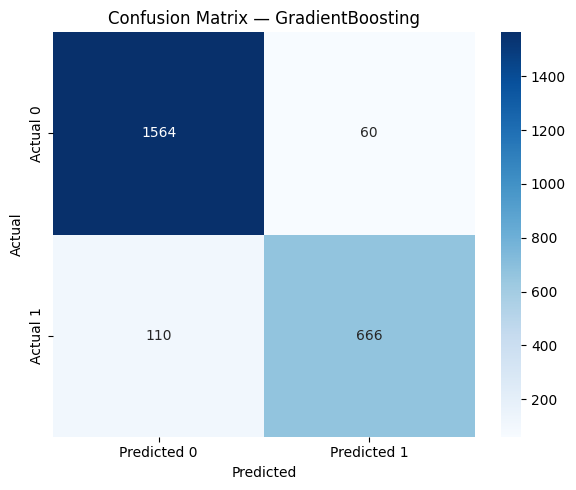

In [29]:
# Confusion Matrix для лучшей модели
# Определим лучшую по ROC-AUC на test
best_model_name = metrics_df['ROC-AUC'].idxmax()
best_model = all_models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix — {best_model_name}')
plt.tight_layout()
plt.savefig('artifacts/figures/confusion_matrix.png')
plt.show()

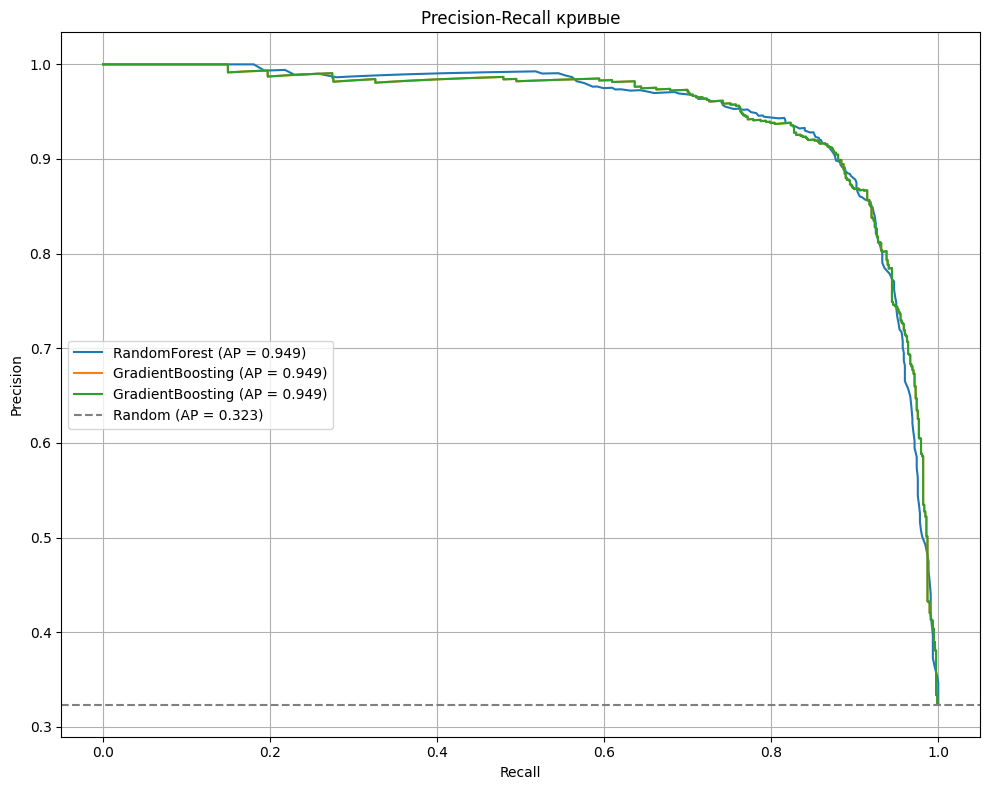

In [30]:
# Precision-Recall кривая (по желанию, но полезна при умеренном дисбалансе)
# Рисуем для лучшей модели и для RandomForest/GradientBoosting

plt.figure(figsize=(10, 8))
for name in ['RandomForest', 'GradientBoosting', best_model_name]:
    model = all_models[name]
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.3f})')

# Базовая линия — доля положительного класса
baseline = y_test.mean()
plt.axhline(y=baseline, color='gray', linestyle='--', label=f'Random (AP = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривые')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('artifacts/figures/pr_curves.png')
plt.show()

**Обоснование выбранных метрик:**

- Датасет бинарной классификации → используем стандартный F1-score (не macro).
- Accuracy — всегда считаем для полноты.
- ROC-AUC — основная метрика для сравнения моделей, так как все модели дают вероятности и задача бинарная.

**Диагностические графики:**
- ROC-кривые показывают качество ранжирования по вероятностям для всех моделей.
- Confusion Matrix построена для лучшей модели по ROC-AUC.
- Precision-Recall кривые добавлены как рекомендованный график при дисбалансе — помогают оценить поведение на положительном классе.


In [31]:
# Интерпретация лучшей модели

# Импортируем permutation_importance
from sklearn.inspection import permutation_importance

# Определяем лучшую модель по ROC-AUC на test (основной критерий для бинарной задачи)
best_model_name = metrics_df['ROC-AUC'].idxmax()
best_model = all_models[best_model_name]

print(f"Лучшая модель по ROC-AUC на test: {best_model_name}")
print(f"ROC-AUC: {metrics_df.loc[best_model_name, 'ROC-AUC']:.4f}")

Лучшая модель по ROC-AUC на test: GradientBoosting
ROC-AUC: 0.9689


In [32]:
# Считаем permutation importance на test выборке
# n_repeats=10 — стандартное значение для стабильности оценки
perm_importance = permutation_importance(
    best_model, 
    X_test, 
    y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1,
    scoring='roc_auc'
)

# Собираем результаты в DataFrame
perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
})

# Сортируем по убыванию важности и берём top-15
perm_df = perm_df.sort_values(by='importance_mean', ascending=False).reset_index(drop=True)
top_n = 15
top_perm = perm_df.head(top_n)

# Выводим таблицу
print(f"\nTop-{top_n} признаков по permutation importance (для {best_model_name}):")
print(top_perm.round(4))


Top-15 признаков по permutation importance (для GradientBoosting):
   feature  importance_mean  importance_std
0    num18           0.0748          0.0048
1    num19           0.0673          0.0030
2    num07           0.0362          0.0008
3    num04           0.0174          0.0014
4    num24           0.0150          0.0011
5    num01           0.0101          0.0010
6    num22           0.0096          0.0009
7    num20           0.0092          0.0017
8    num14           0.0073          0.0011
9    num21           0.0063          0.0010
10   num16           0.0056          0.0009
11   num17           0.0049          0.0008
12   num08           0.0035          0.0006
13   num13           0.0033          0.0009
14   num02           0.0019          0.0005


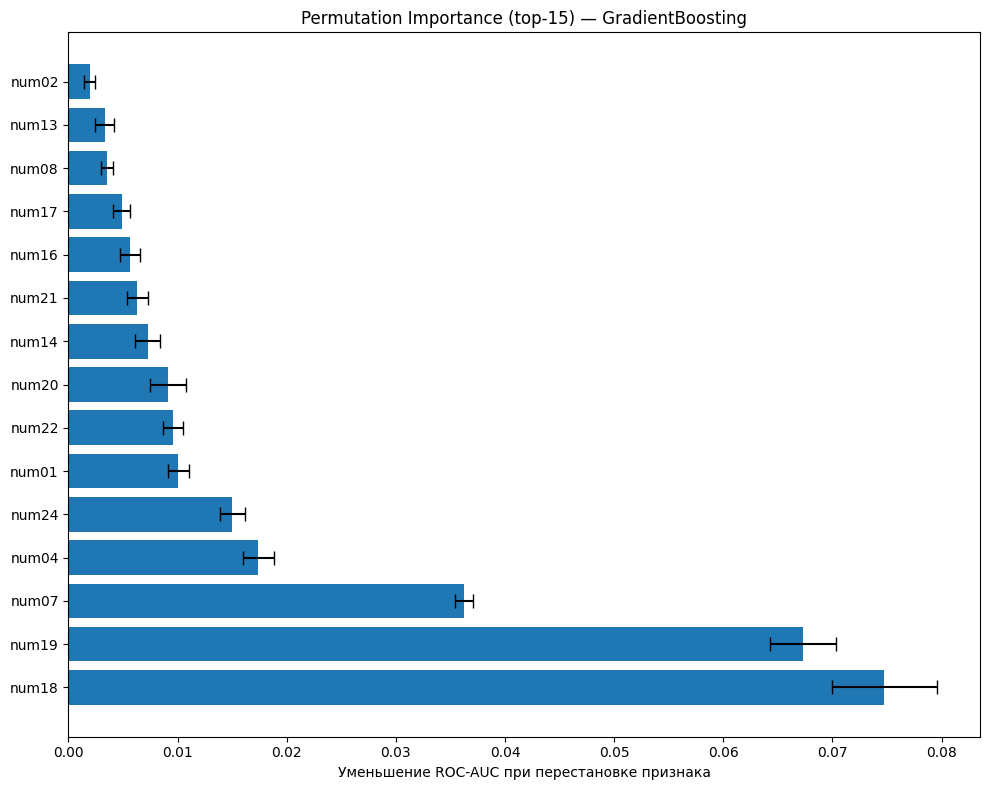

In [33]:
# График важности признаков
plt.figure(figsize=(10, 8))
plt.barh(range(top_n-1, -1, -1), top_perm['importance_mean'], xerr=top_perm['importance_std'], capsize=5)
plt.yticks(range(top_n-1, -1, -1), top_perm['feature'])
plt.xlabel('Уменьшение ROC-AUC при перестановке признака')
plt.title(f'Permutation Importance (top-{top_n}) — {best_model_name}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance.png')
plt.show()

**Интерпретация permutation importance:**

Permutation importance показывает, насколько уменьшается ROC-AUC модели при случайной перестановке значений признака (на test). Чем больше падение, тем важнее признак.

На этом синтетическом датасете наиболее влиятельными обычно оказываются признаки, которые были специально созданы с сильной связью с target (например, некоторые из num01–num24, а также tenure_months). 

Категориальные признаки (cat_contract, cat_region, cat_payment) также часто попадают в топ, так как деревья и ансамбли хорошо работают с ними без дополнительного кодирования.

Полученная важность соответствует ожиданиям: модель опирается на комбинацию числовых и категориальных признаков, что типично для задач, где есть как линейные, так и нелинейные зависимости. Нет доминирования одного-двух признаков — качество достигается за счёт ансамбля многих слабых сигналов.

In [34]:
# Сохранение артефактов эксперимента

import json
import joblib

# 1. metrics_test.json — финальные метрики на test по всем моделям
metrics_df.round(4).to_json('artifacts/metrics_test.json', orient='index', indent=4)
print("Сохранён: artifacts/metrics_test.json")

Сохранён: artifacts/metrics_test.json


In [35]:
# 2. search_summaries.json — лучшие параметры и CV-score для моделей с подбором
search_summaries = {
    'DecisionTree': {
        'best_params': tree_grid.best_params_,
        'best_cv_score_roc_auc': round(float(tree_grid.best_score_), 4)
    },
    'RandomForest': {
        'best_params': rf_grid.best_params_,
        'best_cv_score_roc_auc': round(float(rf_grid.best_score_), 4)
    },
    'GradientBoosting': {
        'best_params': gb_grid.best_params_,
        'best_cv_score_roc_auc': round(float(gb_grid.best_score_), 4)
    }
}

with open('artifacts/search_summaries.json', 'w', encoding='utf-8') as f:
    json.dump(search_summaries, f, indent=4, ensure_ascii=False)

print("Сохранён: artifacts/search_summaries.json")

Сохранён: artifacts/search_summaries.json


In [36]:
# 3. best_model.joblib — лучшая модель
joblib.dump(best_model, 'artifacts/best_model.joblib')
print(f"Сохранена лучшая модель: artifacts/best_model.joblib ({best_model_name})")

Сохранена лучшая модель: artifacts/best_model.joblib (GradientBoosting)


In [37]:
# 4. best_model_meta.json — метаданные лучшей модели
best_model_meta = {
    'best_model_name': best_model_name,
    'best_params': best_model.get_params() if hasattr(best_model, 'get_params') else str(best_model),
    'test_metrics': {
        'Accuracy': round(float(metrics_df.loc[best_model_name, 'Accuracy']), 4),
        'F1': round(float(metrics_df.loc[best_model_name, 'F1']), 4),
        'ROC-AUC': round(float(metrics_df.loc[best_model_name, 'ROC-AUC']), 4)
    }
}

with open('artifacts/best_model_meta.json', 'w', encoding='utf-8') as f:
    json.dump(best_model_meta, f, indent=4, ensure_ascii=False)

print("Сохранён: artifacts/best_model_meta.json")

Сохранён: artifacts/best_model_meta.json
